<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


### The following describes the dataset variables:

·      CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [6]:
# check the data type of data frame "df" by .dtypes
print(boston_df.dtypes)

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object


## Use the describe method to get a statistical summary of each column, such as count, column mean value, column standard deviation, etc.

In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Provide boxplot for "Median value of owner-occupied homes"

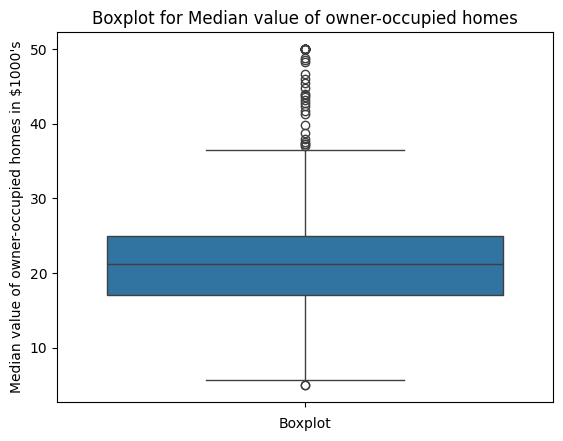

In [28]:
ax = sns.boxplot(y='MEDV', data=boston_df)
ax.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")
pyplot.show()

## Provide Bar Plot for Charles River Variable

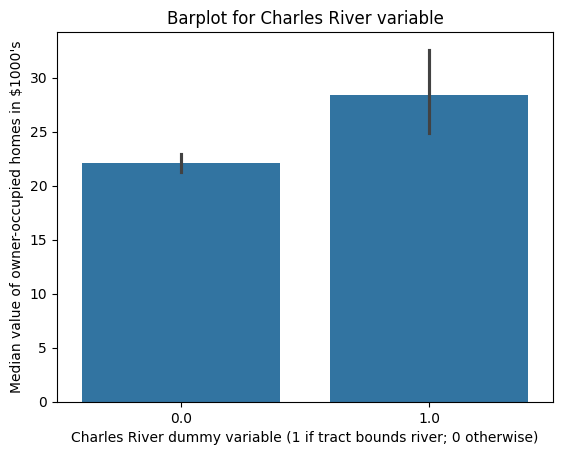

In [30]:
ax = sns.barplot(x='CHAS', y='MEDV', data=boston_df)
ax.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Charles River dummy variable (1 if tract bounds river; 0 otherwise)"
        , title = "Barplot for Charles River variable")
pyplot.show()

## Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [ ]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

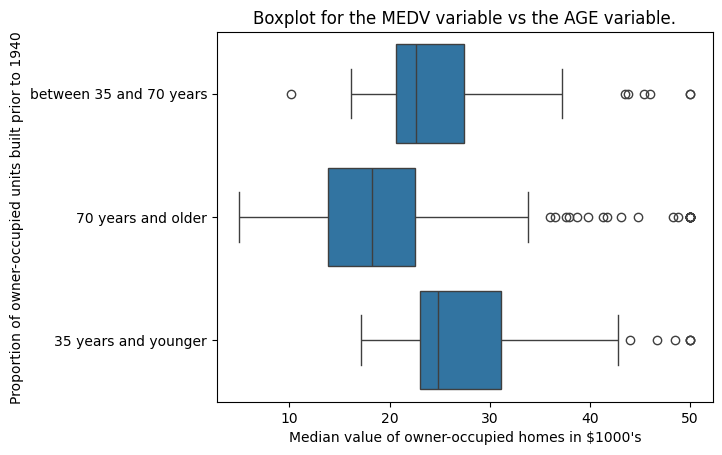

In [29]:
ax = sns.boxplot(x='MEDV', y='age_group', data=boston_df)
ax.set(xlabel = "Median value of owner-occupied homes in $1000's"
           , ylabel = "Proportion of owner-occupied units built prior to 1940"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")
pyplot.show()

## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

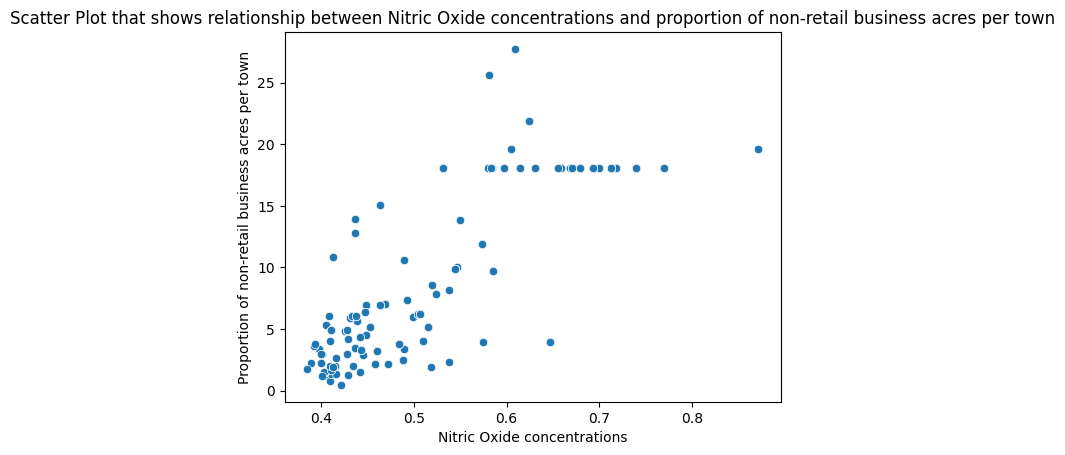

In [33]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel = "Nitric Oxide concentrations"
           , ylabel = "Proportion of non-retail business acres per town"
           , title = "Scatter Plot that shows relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town")
pyplot.show()

## Create a histogram for the pupil to teacher ratio variable

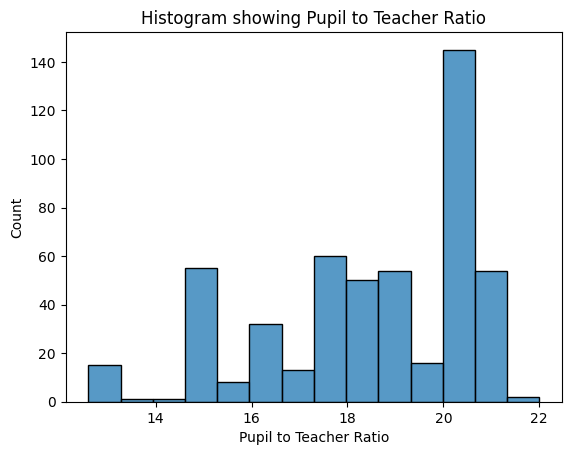

In [34]:
ax = sns.histplot(boston_df['PTRATIO'], kde = False)
ax.set(xlabel = "Pupil to Teacher Ratio"
           , ylabel = "Count"
           , title = "Histogram showing Pupil to Teacher Ratio")
pyplot.show()

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis: 
H1: x1 = x2 ("There is no difference in median value of houses bounded by the Charles river".)

H2: x1 ≠ x2 ("There is a difference in median value of houses bounded by the Charles river".)

In [21]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [20]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                     boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = True)

TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

#### Conclusion:
The P-value is less than 0.05 (the alpha level), so we reject the null hypothesis as there is significant evidence that there is a statistical difference in median value of houses bounded by the Charles river.

## Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

#### Hypothesis:
H1: x1 = x2 ("There is no difference in median value of houses for each proportion of owner occupied units built prior to 1940.")

H2: x1 ≠ x2 ("There is a difference in median value of houses for each proportion of owner occupied units built prior to 1940.")

In [22]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [23]:
thirtyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

In [24]:
f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


#### Conclusion:
The P-value is greater than 0.05 (the alpha level), so we conclude that there is no difference in median value of houses for each proportion of owner occupied units built prior to 1940.

## Can we conclude that there is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

#### Hypothesis:
H1: x1 = x2 ("There is no relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.")

H2: x1 ≠ x2 ("There is a relationship between Nitric Oxide concentrations and proportion of non-retail business acres per town.")

In [35]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

#### Conclusion:
The pvalue is less than 0.05 (the alpha level), so we reject the null hupothesis and conclude that there is a relationship between Nitric oxide concnetrations and proportion of non-retail business acres per town.

## What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

#### Hypothesis:
H1: x1 = x2 ("There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")

H2: x1 ≠ x2 ("There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.")

In [36]:
## X is the input variables (or independent variables)
X = boston_df['DIS']

## y is the target/dependent variable
y = boston_df['MEDV']

## add an intercept (beta_0) to our model
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.21e-08
Time:                        07:33:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Conclusion:
The T statistics for the "DIS" variable is positive 5.795 and the p-value is less than 0.05, which means that there is a statistical difference in the mean values for weighted distances.